# SMILES augmentation

Let's take a look at an example molecule and see how we can apply different augmentation strategies to its SMILES.

Let's consider the fomepizole drug. Its SMILES is given by the following string:

In [ ]:
smiles = "CC1=CNN=C1"
smiles

Let's visalize this molecule using RDKit.

In [2]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw, AllChem

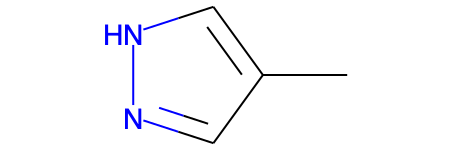

In [3]:
molecule = Chem.MolFromSmiles(smiles)
molecule

## Canonical SMILES

Let's convert the SMILES into RDKit the canonical form.

In [4]:
from maxsmi.utils_smiles import smiles_to_canonical, smiles_to_random

In [5]:
canonical_smiles = smiles_to_canonical(smiles)
print(f"Canonical SMILES of the kinase inhibitor: {canonical_smiles} \n"
        f"Length of canonical smiles: {len(canonical_smiles)}")

Canonical SMILES of the kinase inhibitor: Cc1cn[nH]c1 
Length of canonical smiles: 11


## Random SMILES

Let's look at different variations of the SMILES

In [6]:
smiles_to_random?

Signature: smiles_to_random(smiles, int_aug=50)
Docstring:
Takes a SMILES (not necessarily canonical) and returns `int_aug` random variations of this SMILES.

Parameters
----------
smiles : str
    SMILES string describing a compound.
int_aug : int, Optional, default: 50
    The number of random SMILES generated.

Returns
-------
list
    A list of `int_aug` random (may not be unique) SMILES or None if the initial SMILES is not valid.
File:      ~/Documents/github/maxsmi/maxsmi/utils_smiles.py
Type:      function


In [7]:
random_smiles = smiles_to_random(smiles, int_aug=5)

In [8]:
print(f"Random SMILES: {random_smiles}")

Random SMILES: ['Cc1c[nH]nc1', 'c1[nH]ncc1C', 'Cc1c[nH]nc1', '[nH]1ncc(C)c1', 'c1c(c[nH]n1)C']


# Augmentation strategies

## No augmentation
As a baseline, no random SMILES are generated, just one SMILES is kept.

## Augmentation with duplication
Here random SMILES are generated on the fly, despite duplicates.

In [9]:
from maxsmi.augmentation_strategies import augmentation_with_duplication

In [10]:
augmentation_with_duplication?

Signature: augmentation_with_duplication(smiles, augmentation_number)
Docstring:
Takes a SMILES and returns a list of random SMILES with possible duplicates.

Parameters
----------
smiles : str
    SMILES string describing a compound.
augmentation_number : int
    The integer to generate the number of random SMILES.

Returns
-------
list
    A list containing the given number of random SMILES, which might include duplicated SMILES.
File:      ~/Documents/github/maxsmi/maxsmi/augmentation_strategies.py
Type:      function


In [11]:
duplicated_smiles = augmentation_with_duplication(smiles, 100)

In [12]:
from collections import Counter

In [13]:
Counter(duplicated_smiles)

Counter({'[nH]1ncc(c1)C': 6,
         'n1cc(C)c[nH]1': 8,
         'Cc1cn[nH]c1': 8,
         'c1[nH]ncc1C': 11,
         'c1(C)cn[nH]c1': 6,
         'c1c(cn[nH]1)C': 3,
         '[nH]1ncc(C)c1': 6,
         'n1cc(c[nH]1)C': 4,
         'c1n[nH]cc1C': 7,
         'n1[nH]cc(c1)C': 4,
         'c1(C)c[nH]nc1': 3,
         'c1c(C)cn[nH]1': 3,
         'n1[nH]cc(C)c1': 6,
         '[nH]1cc(C)cn1': 2,
         'c1(cn[nH]c1)C': 5,
         'c1c(c[nH]n1)C': 2,
         'c1(c[nH]nc1)C': 6,
         'c1c(C)c[nH]n1': 5,
         '[nH]1cc(cn1)C': 2,
         'Cc1c[nH]nc1': 3})

## Augmentation without duplication
Here unique random SMILES are generated.

In [14]:
from maxsmi.augmentation_strategies import augmentation_without_duplication

In [15]:
non_duplicated_smiles = augmentation_without_duplication(smiles, 100)

In [16]:
Counter(non_duplicated_smiles)

Counter({'c1(cn[nH]c1)C': 1,
         'Cc1c[nH]nc1': 1,
         'c1c(cn[nH]1)C': 1,
         'c1[nH]ncc1C': 1,
         'c1(C)cn[nH]c1': 1,
         'c1c(C)c[nH]n1': 1,
         'c1n[nH]cc1C': 1,
         'c1(C)c[nH]nc1': 1,
         'c1c(c[nH]n1)C': 1,
         'Cc1cn[nH]c1': 1,
         'n1[nH]cc(C)c1': 1,
         'n1cc(C)c[nH]1': 1,
         '[nH]1ncc(C)c1': 1,
         'c1c(C)cn[nH]1': 1,
         '[nH]1cc(cn1)C': 1,
         '[nH]1ncc(c1)C': 1,
         '[nH]1cc(C)cn1': 1,
         'n1[nH]cc(c1)C': 1,
         'c1(c[nH]nc1)C': 1,
         'n1cc(c[nH]1)C': 1})

## Augmentation with reduced duplication
Here random SMILES are generated and only a fraction of duplicates are kept.

## Estimated maximum augmentation
Here we try to generate all possible valid random SMILES.

In [17]:
from maxsmi.augmentation_strategies import augmentation_maximum_estimation

In [18]:
estimated_max_smiles = augmentation_maximum_estimation(smiles, 10)

In [19]:
estimated_max_smiles

['[nH]1cc(C)cn1',
 'n1cc(C)c[nH]1',
 '[nH]1cc(cn1)C',
 'Cc1c[nH]nc1',
 'c1c(C)c[nH]n1',
 '[nH]1ncc(c1)C',
 'c1c(cn[nH]1)C',
 'c1[nH]ncc1C',
 'n1[nH]cc(c1)C',
 'c1(C)cn[nH]c1',
 'Cc1cn[nH]c1',
 'c1c(c[nH]n1)C',
 '[nH]1ncc(C)c1',
 'c1n[nH]cc1C',
 'c1c(C)cn[nH]1']

# Deep Neural Network Input

Here's an example of how to numerically encode a SMILES to feed to a neural network.

## Simple example of one-hot encoded SMILES

Let's look at the afatinib kinase inhibitor.

In [20]:
import matplotlib.pyplot as plt
from matplotlib import colors
from maxsmi.utils_encoding import (
    char_replacement,
    get_unique_elements_as_dict,
    one_hot_encode,
)

In [21]:
smiles = "CN(C)CC=CC(=O)NC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC(=C(C=C3)F)Cl)OC4CCOC4"
print("Length of original smile: \t\t", len(smiles))

# Replace double symbols
new_smiles = char_replacement([smiles])[0]
print("Length of double characters replaced smiles : ", len(new_smiles))

# Obtain dictionary for this smile
smi_dict = get_unique_elements_as_dict(new_smiles)
print("Number of unique characters: \t\t", len(smi_dict))

# One-hot encode smile
one_hot_smiles = one_hot_encode(new_smiles, smi_dict)
print("Shape of one-hot encoded matrix: \t", one_hot_smiles.shape)

Length of original smile: 		 67
Length of double characters replaced smiles :  66
Number of unique characters: 		 12
Shape of one-hot encoded matrix: 	 (12, 66)


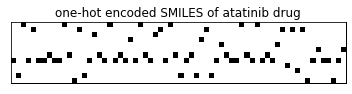

In [22]:
f, ax = plt.subplots()
ax.imshow(one_hot_smiles, cmap=colors.ListedColormap([(1, 1, 1), "black"]))
ax.set_xticks([])
ax.set_yticks([])
ax.patch.set_edgecolor("black")
ax.patch.set_linewidth("1")
plt.title(f"one-hot encoded SMILES of atatinib drug")
plt.show()

In [23]:
# Let's consider the semaxanib drug, which is kinase inhibitor ${[1]}$. Its SMILES is given by the following string:
# smiles = "CC1=CC(=C(N1)C=C2C3=CC=CC=C3NC2=O)C"
# smiles
# [1] Carles, F.; Bourg, S.; Meyer, C.; Bonnet, P. PKIDB: A Curated, Annotated and Updated Database of Protein Kinase Inhibitors in Clinical Trials. Molecules 2018, 23, 908. https://doi.org/10.3390/molecules23040908

In [60]:
# smiles = "CC1=CC(=C(N1)C=C2C3=CC=CC=C3NC2=O)C"
# smiles = "CCCN(CCC)c1c([N+](=O)[O-])cc(C(F)(F)F)cc1[N+](=O)[O-]"
smiles = "CCOP(=S)(OCC)SCSP(=S)(OCC)OCC"

In [67]:
%%timeit
estimated_max_smiles = augmentation_maximum_estimation(smiles, 50)

12.7 ms ± 182 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [68]:
len(estimated_max_smiles), len(set(estimated_max_smiles))

(771, 771)

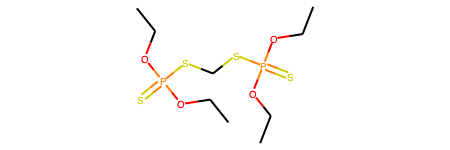

In [61]:
molecule = Chem.MolFromSmiles(smiles)
molecule